### Ejercicio 1: Obtenga al menos 10 conjuntos de datos en formato CSV, ARFF u otro cualquiera

### Ejercicio 2: Seleccione al menos 3 clasificadores dentro de los disponibles en Scikit. Se recomienda elegir tres de entre los siguientes: árboles de decisión, k vecinos más cercanos. máquinas de vectores soporte y clasificador Naive de Bayes. No uso combinaciones (emsebles) de modelos que serán objeto de una práctica posterior.

Los tres clasificadores elegidos:
    - SVM
    - KNN
    - DTC
Los clasificadores tienen buenos resultados, en algunas hizo falta un poco de procesamiento previo

### Ejercicio 3: Para cada uno de los problemas seleccionados realice las siguientes tareas:
       3.1 Seleccione como método para obtener el error la validación cruzada de 10 particiones o el método hold out.
       3.2 Ejecute para cada clasificador seleccionado el entrenamiento y anote el error.
       3.3 Represente gráficamente el error obtenido con cada uno de los métodos de clasificación.

|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('0diabetes.arff'): 77.60416666666666 %
Patron a clasificar del dataset(758)

Clase predicha KNN
b'tested_negative'
----------------
Mejores valores hiperparametros KNN: {'n_neighbors': 7}
|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados SVM ('0diabetes.arff'): 80.20833333333334 %
Patron a clasificar del dataset(758)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados DTC ('0diabetes.arff'): 78.125 %
Patron a clasificar del dataset(758)

Clase predicha KNN
b'tested_negative'
----------------
|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||
Porcentaje de bien clasificados KNN ('1glass.arff'): 59.25925925925925 %
Patron a clasificar del dataset(112)

Clase predicha KNN
b'build wind float'
----------------
Mejor

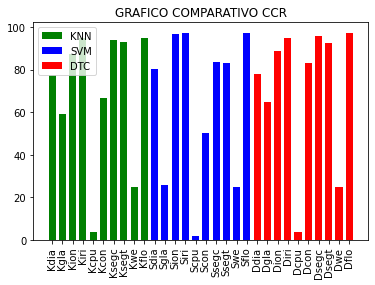





----------------------------GRAFICO COMPARATIVO ERROR----------------------------


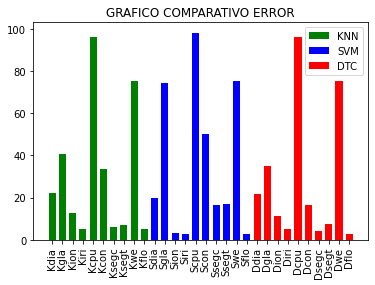

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
from sklearn.metrics import mean_squared_error
import pydotplus
import ipywidgets as widgets
from scipy.io import arff
import pandas as pd
from os import listdir
import random
from scipy.stats import wilcoxon,rankdata,f,friedmanchisquare

import warnings
warnings.filterwarnings('ignore')

def pintarGraficos(matrix,titulo):
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes

    x1 = ['Kdia', 'Kgla', 'Kion', 'Kiri','Kcpu','Kcon', 'Ksegc','Ksegt','Kwe','Kflo']
    x2 = ['Sdia', 'Sgla', 'Sion', 'Siri','Scpu','Scon', 'Ssegc','Ssegt','Swe','Sflo']
    x3 = ['Ddia', 'Dgla', 'Dion', 'Diri','Dcpu','Dcon', 'Dsegc','Dsegt','Dwe','Dflo']
    y1 = []
    y2 = []
    y3 = []
    for columna in range(1, len(lista_datasets) + 1):
        y1.append(matrix[1][columna])
        y2.append(matrix[2][columna])
        y3.append(matrix[3][columna])

    plt.bar(x1, y1, color='g', width=0.7, align='center')
    plt.bar(x2, y2, color='b', width=0.7, align='center')
    plt.bar(x3, y3, color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title(titulo)
    plt.show()
    print('\n\n\n')

KNN_PARAM = [{
                    'n_neighbors':(1,2,3,4,5,6,7)
                    }]
optimo_KNN = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=KNN_PARAM, n_jobs=-1, cv=5)


def predecir(aux,clasificador):
    array = clasificador.predict([aux])
    print('Clase predicha KNN')
    print(target[1][array][0])
    print('----------------')
    
def pintarGraficoFriedman(lista_dataset,ranking):
    plt.figure(u'Gráfica de barras')
    
    for i in range(0,10):
         plt.bar(lista_dataset[i],ranking[i] , width=0.7, align='center')
   
    plt.xticks(rotation='vertical')
    plt.legend(lista_dataset)
    plt.title('Grafico de puntuacion')
    plt.show()
    
def pintarGraficos(matriz,titulo):
    fig = plt.figure(u'Gráfica de barras')
    ax = fig.add_subplot(111)  # Axes

    x1 = ['Kdia', 'Kgla', 'Kion', 'Kiri','Kcpu','Kcon', 'Ksegc','Ksegt','Kwe','Kflo']
    x2 = ['Sdia', 'Sgla', 'Sion', 'Siri','Scpu','Scon', 'Ssegc','Ssegt','Swe','Sflo']
    x3 = ['Ddia', 'Dgla', 'Dion', 'Diri','Dcpu','Dcon', 'Dsegc','Dsegt','Dwe','Dflo']
    y1 = []
    y2 = []
    y3 = []
    for columna in range(1, len(lista_datasets) + 1):
        y1.append(matriz[1][columna])
        y2.append(matriz[2][columna])
        y3.append(matriz[3][columna])

    plt.bar(x1, y1, color='g', width=0.7, align='center')
    plt.bar(x2, y2, color='b', width=0.7, align='center')
    plt.bar(x3, y3, color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title(titulo)
    plt.show()
    print('\n\n\n')

#MAIN
m_ccr   = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
m_error = [['---',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['KNN',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['SVM',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],['DTC',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]]
lista_datasets = listdir('./Datos/P3/')

c = 1
for i in lista_datasets:
    m_ccr[0][c] = i
    m_error[0][c] = i
    c = c + 1


lista_datasets = listdir('./Datos/P3/')
AUX = 1
for indice in lista_datasets:

    dataset = arff.loadarff('./Datos/P3/'+str(indice))
    df = pd.DataFrame(dataset[0])
    target = pd.factorize(df['class'])
    X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:, df.columns != 'class'],target[0], test_size=0.25)

    indice_aleatorio = random.randint(1, df.shape[0])
    patron_aleatorio = df.iloc[indice_aleatorio, df.columns != 'class']

    print('|||||||||||||||||||||||||||||KNN||||||||||||||||||||||||||||||||||||')
    
    optimo_KNN.fit(X_train,Y_train)
    print('Porcentaje de bien clasificados KNN (\''+str(indice)+'\'): '+str(optimo_KNN.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset('+str(indice_aleatorio)+')\n')
    m_ccr[1][AUX] = round(optimo_KNN.score(X_test,Y_test),10)*100
    m_error[1][AUX] = round(100 - m_ccr[1][AUX],10)
    predecir(patron_aleatorio,optimo_KNN)
    print('Mejores valores hiperparametros KNN: '+str(optimo_KNN.best_params_))

    print('|||||||||||||||||||||||||||||SVM||||||||||||||||||||||||||||||||||||')
    svm = SVC()
    svm.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados SVM (\''+str(indice)+'\'): '+str(svm.score(X_test,Y_test)*100)+' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    m_ccr[2][AUX] = round(svm.score(X_test,Y_test),10)*100
    m_error[2][AUX] = round(100 - m_ccr[2][AUX],10)
    predecir(patron_aleatorio,svm)


    print('|||||||||||||||||||||||||||||DTC||||||||||||||||||||||||||||||||||||')
    dtc=DecisionTreeClassifier()
    dtc.fit(X_train, Y_train)
    print('Porcentaje de bien clasificados DTC (\'' + str(indice) + '\'): ' + str(dtc.score(X_test, Y_test) * 100) + ' %')
    print('Patron a clasificar del dataset(' + str(indice_aleatorio) + ')\n')
    m_ccr[3][AUX] = round(dtc.score(X_test,Y_test),10)*100
    m_error[3][AUX] = round(100 - m_ccr[3][AUX],10)
    predecir(patron_aleatorio, dtc)
    AUX = AUX + 1

print('----------------------------GRAFICO COMPARATIVO CCR----------------------------')
pintarGraficos(m_ccr,'GRAFICO COMPARATIVO CCR')

print('----------------------------GRAFICO COMPARATIVO ERROR----------------------------')
pintarGraficos(m_error,'GRAFICO COMPARATIVO ERROR')



Método usado hold out 75%, 25% usado para todas las pruebas.
En las gráficas podemos comprobar CCR y errores de los métodos seleccionados.

### Ejercicio 4: Use el test de Wilcoxon de comparación de algoritmos sobre N problemas y aplíquelo a dos de los algoritmos anteriores. Obtenga el lrango de Friedman para cada clasificador y configuración y represente gráficamente los resultados. Aplique el test de Iman-Davenport sobre los tres clasificadores.

Test de Wilcoxon KNN vs SVM value: WilcoxonResult(statistic=27.0, pvalue=1.0)


Test de Wilcoxon KNN vs DTC value: WilcoxonResult(statistic=15.0, pvalue=0.3742593192802244)


Test de Wilcoxon SVM vs DTC value: WilcoxonResult(statistic=8.0, pvalue=0.16142946236708333)




Rango de Friedman KNN
[ 4.  5.  6. 10.  1.  3.  8.  7.  2.  9.]


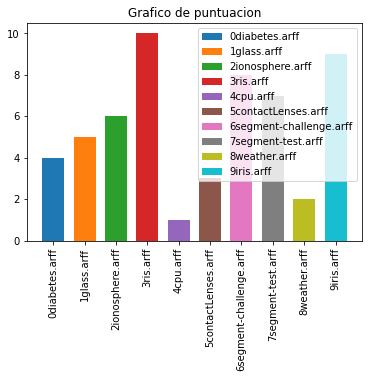



Rango de Friedman SVM
[ 5.   2.   8.  10.   1.   3.5  6.   7.   3.5  9. ]


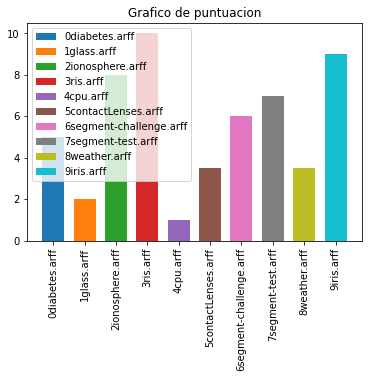



Rango de Friedman DTC
[3.  4.  6.  9.5 1.  5.  8.  7.  2.  9.5]


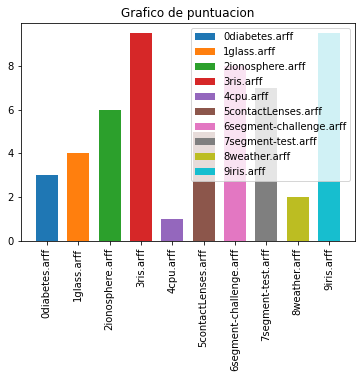





Test de Iman Davenport
No hay diferencias significativas
Valor de F: 0.6521739130434782 , valor de RESULT: 1.1205070196871774




CCR de las instancias: ['0diabetes.arff', '1glass.arff', '2ionosphere.arff', '3ris.arff', '4cpu.arff', '5contactLenses.arff', '6segment-challenge.arff', '7segment-test.arff', '8weather.arff', '9iris.arff']
     0               1            2                 3          4          5                    6                        7                   8              9          10
0  ---  0diabetes.arff  1glass.arff  2ionosphere.arff  3ris.arff  4cpu.arff  5contactLenses.arff  6segment-challenge.arff  7segment-test.arff  8weather.arff  9iris.arff
1  KNN         72.3958      75.9259           89.7727    97.3684    3.77358              33.3333                  94.6667              91.133             25     94.7368
2  SVM         72.9167      33.3333           96.5909        100          0                   50                  82.1333              82.266            

In [5]:
def wilcoxonTest(arrayX,arrayY,text):
    print('Test de Wilcoxon '+text+' value: '+str(wilcoxon(arrayX,arrayY)))
    
    
def pintarGraficoFriedman(lista_dataset,ranking):
    plt.figure(u'Gráfica de barras')  # Figure
    
    for i in range(0,10):
         plt.bar(lista_dataset[i],ranking[i] , width=0.7, align='center')
   
    plt.xticks(rotation='vertical')
    plt.legend(lista_dataset)
    plt.title('Grafico de puntuacion')
    plt.show()
    
def pintarGraficos(matrix,titulo):
    fig = plt.figure(u'Gráfica de barras')  # Figure
    ax = fig.add_subplot(111)  # Axes

    x1 = ['Kdia', 'Kgla', 'Kion', 'Kiri','Kcpu','Kcon', 'Ksegc','Ksegt','Kwe','Kflo']
    x2 = ['Sdia', 'Sgla', 'Sion', 'Siri','Scpu','Scon', 'Ssegc','Ssegt','Swe','Sflo']
    x3 = ['Ddia', 'Dgla', 'Dion', 'Diri','Dcpu','Dcon', 'Dsegc','Dsegt','Dwe','Dflo']
    y1 = []
    y2 = []
    y3 = []
    for columna in range(1, len(lista_datasets) + 1):
        y1.append(matrix[1][columna])
        y2.append(matrix[2][columna])
        y3.append(matrix[3][columna])

    plt.bar(x1, y1, color='g', width=0.7, align='center')
    plt.bar(x2, y2, color='b', width=0.7, align='center')
    plt.bar(x3, y3, color='r', width=0.7, align='center')
    plt.xticks(rotation='vertical')
    plt.legend(['KNN', 'SVM', 'DTC'])
    plt.title(titulo)
    plt.show()
    print('\n\n\n')



m_ccr = pd.DataFrame(m_ccr)
m_error = pd.DataFrame(m_error)

#Tests de Wilcoxon
wilcoxonTest(m_ccr.loc[1,1:], m_ccr.loc[2,1:],'KNN vs SVM')
print('\n')
wilcoxonTest(m_ccr.loc[1,1:], m_ccr.loc[3,1:],'KNN vs DTC')
print('\n')
wilcoxonTest(m_ccr.loc[2,1:], m_ccr.loc[3,1:],'SVM vs DTC')

print('\n\n\n')

print('Rango de Friedman KNN')
ranking=rankdata(m_ccr.loc[1,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n')
print('Rango de Friedman SVM')
ranking=rankdata(m_ccr.loc[2,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n')
print('Rango de Friedman DTC')
ranking=rankdata(m_ccr.loc[3,1:])
print(ranking)
pintarGraficoFriedman(lista_datasets,ranking)
print('\n\n\n')


#Test de Iman Davemport

print('Test de Iman Davenport')
nDatasets=10
kAlgoritms=3
chi=friedmanchisquare(m_ccr.loc[1,1:],m_ccr.loc[2,1:],m_ccr.loc[3,1:])
F=((nDatasets-1)*chi[0])/(nDatasets*(kAlgoritms-1)-chi[0])
RESULT = f.ppf(q=F, dfn=kAlgoritms-1, dfd=(kAlgoritms-1)*(nDatasets-1))
if F < RESULT:
    print('No hay diferencias significativas')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
elif F > RESULT:
    print('Si hay diferencias significativas')
    print('Valor de F: '+str(F)+' , valor de RESULT: '+str(RESULT))
# create output widgets

print('\n\n\n')
print('CCR de las instancias: '+str(lista_datasets))
print(m_ccr.to_string())
print('\n\n\n')
print('Error de las instancias: '+str(lista_datasets))
print(m_error.to_string())



El test no paramétrico prueba de los rangos con signo de Wilcoxon, también conocido como Wilcoxon signed-rank test, permite comparar poblaciones cuando sus distribuciones (normalmente interpretadas a partir de las muestras) no satisfacen las condiciones necesarias para otros test paramétricos. Es una alternativa al t-test de muestras dependientes cuando las muestras no siguen una distribución normal (muestran asimetría o colas) o cuando tienen un tamaño demasiado reducido para poder determinar si realmente proceden de poblaciones normales.

Con el test de Wilcoxon podemos saber como de parecidas son las muestras del experimento, el método funciona con un número mínimo de datos que son los 10 dataset usados.
Con el test de Friedman podemos averiguar como se esta comportando cada clasificador con cada dataset usado.
Con el test de Iman Davenport podemos saber si existen diferencias sicnificativas globales en los clasificadores usados.

### Ejercicio 6: Para uno de los clasificadores elegidos utilice una validación de los hiperparámetros con grid search y compare su rendimiento con el método con hiperparámetros fijados a priori.

GridSearchCV implementa un método de "ajuste" y "puntuación", buscará los parámetros óptimos para un modelo dentro de un rango.